In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
ignore=True
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-profitable-customer-segments/customerTargeting.csv


**Content**
In order to enable machine learning experimentation, this dataset has been structured as follows:

Each row is a comparison between two groups of potential customers:<br>
1. Column names starting with "g1" represent characteristics of the first customer group (these were known before the campaign was run).
2. Column names starting with "g2" represent characteristics of the second customer group (these were known before the campaign was run)
3. Column names starting with "c_" are features representing some comparison of the two groups (also known before the campaign was run)

The last column, named "target", is categorical, with 3 categories:<br>
0 - none of the two groups were profitable<br>
1 - group1 turned out to be more profitable<br>
2 - group2 turned out to be more profitable<br>

**Inspiration**
Can you build a machine learning classifier that accurately predicts which of the 2 groups (if any) will turn out to be more profitable?

In [2]:
df=pd.read_csv("/kaggle/input/predicting-profitable-customer-segments/customerTargeting.csv")

In [3]:
df.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [4]:
df.shape

(6620, 71)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [6]:
df.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


# <h1 style="background-color:Crimson;color:white;text-align:center;">Analysing Target</h1>

<AxesSubplot:xlabel='target', ylabel='count'>

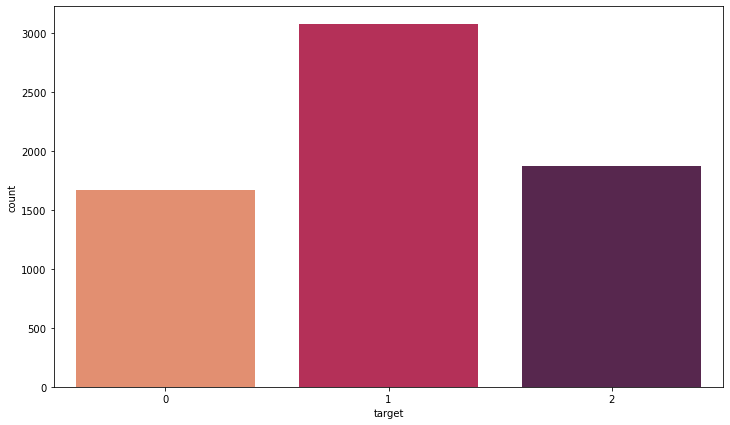

In [9]:
fig=plt.figure(figsize=(12,7))
sns.countplot(x=df["target"], palette = 'rocket_r')

<h1 style="background-color:Crimson;color:white;text-align:center;">Dropping Feature(Variance Threshold)</h1>
<div class="alert alert-info">Dropping Columns based on low Variance since they do not contribute much in prediction. This method removes features with variation below a certain cutoff.</div>

In [10]:
from sklearn.feature_selection import VarianceThreshold
X=df.drop(['target'],axis=1)
Y=df['target']

In [11]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [12]:
sum(var_thres.get_support()) #Counting columns with variance threshold by grt_support method

70

In [13]:
constant_columns = [column for column in X.columns #Checking for contsant columns 
                    if column not in X.columns[var_thres.get_support()]]

In [14]:
X.drop(constant_columns,axis=1)#Dropping constant columns 

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28
0,4.50,1,3,4,5,1,1,4,6,0,...,-5,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76
1,2.20,24,22,46,10,24,28,18,22,-4,...,-9,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85
2,12.00,7,4,11,18,8,11,2,10,-3,...,-36,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05
3,1.91,8,5,13,14,6,7,6,9,-1,...,9,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82
4,2.50,23,16,39,14,33,25,18,27,8,...,-8,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.30,3,6,9,1,2,0,9,4,2,...,2,0.106613,0.044682,1.776000,-0.288000,0,2.888000,0.672000,-0.114780,2.09
6616,1.85,19,12,31,6,15,9,15,14,6,...,17,1.450189,1.128954,-0.465596,0.454124,0,-1.204408,-0.405118,-0.002936,1.87
6617,2.50,5,8,13,19,3,8,12,10,-5,...,-1,-0.370035,-0.075999,-0.051984,0.050770,0,1.743444,1.159725,0.019195,1.72
6618,1.80,5,4,9,10,4,3,2,3,1,...,3,0.313635,0.084571,-0.567168,-0.163008,0,1.959168,1.396416,0.071180,1.72


<h1 style="background-color:Crimson;color:white;text-align:center;">Getting Correlation Among Features & with Target</h1>

In [15]:
#Feature Correlation
cor_target =df.corr().abs()
Target_Corr = cor_target.corr()['target'].to_frame().reset_index() #Feature Correlation related to SalePrice
Feature_corr =cor_target.unstack().to_frame(name='Correlation') # Feature Relation
Feature = Feature_corr[(Feature_corr['Correlation']>=0.80)&(Feature_corr['Correlation']<1)].sort_values(by='Correlation', ascending = False).reset_index()
display(Feature)

,level_0,level_1,Correlation
0,g1_13,g1_14,0.976476
1,g1_14,g1_13,0.976476
2,g2_14,g2_13,0.975890
3,g2_13,g2_14,0.975890
4,c_20,c_21,0.973881
...,...,...,...
121,g1_5,g1_12,0.802206
122,g1_6,g1_3,0.801764
123,g1_3,g1_6,0.801764
124,g1_15,g1_16,0.800705


<div class="alert alert-info" role="alert">
Dropping Columns based on Correlation</div>

In [16]:
cor_target =df.corr()
# Select upper triangle of correlation matrix
upper = cor_target.where(np.triu(np.ones(cor_target.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.82
to_drop = [column for column in upper.columns if any(upper[column] > 0.82)]
df=df.drop(df[to_drop], axis=1)

In [17]:
my_corr=df.corr() # Correlation of newly created dataframe 
cor_target = abs(my_corr["target"]) # Correlation with respect to target column 
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2] # Columns whose correlation is greater than 0.5
display(relevant_features) # getting the correlation values with Correlation greater than 0.5

g1_1      0.232350
c_2       0.219371
target    1.000000
Name: target, dtype: float64

<h1 style="background-color:Crimson;color:white;text-align:center;">Checking VIF</h1>

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

1. A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
2. Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
3. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [18]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [19]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = add_constant(X)
vif = pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

In [20]:
display(vif.sort_values(ascending = False).head(10))

c_13     1.063467e+07
g2_11    3.335492e+06
c_27     2.323426e+06
c_22     1.773375e+06
g2_3     8.591430e+05
g1_10    7.954390e+05
g1_2     6.129726e+05
g2_2     5.942926e+05
c_15     4.828239e+05
c_16     1.827725e+05
dtype: float64

In [21]:
df.shape

(6620, 49)

<h1 style="background-color:Crimson;color:white;text-align:center;">Mutual Info Gain</h1>

<div class="alert alert-success" role="alert">Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be equal to zero if and only if two random variables are independent, and higher values mean higher dependency. Mutual information measures the dependency between the variables.<div>

In [22]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,Y)
mutual_info

array([0.10166519, 0.01756634, 0.01595976, 0.0381315 , 0.        ,
       0.03020247, 0.03211762, 0.01127461, 0.01542218, 0.02305982,
       0.00770155, 0.01178585, 0.02191085, 0.02291099, 0.09758014,
       0.        , 0.02456986, 0.0315737 , 0.01180852, 0.03110829,
       0.03196288, 0.00355382, 0.02784677, 0.02054425, 0.01897361,
       0.029857  , 0.        , 0.01316686, 0.11814954, 0.03844319,
       0.01528767, 0.01479437, 0.03306926, 0.01440292, 0.02894735,
       0.        , 0.05035319, 0.04660839, 0.        , 0.        ,
       0.01303215, 0.00108794, 0.        , 0.        , 0.01216019,
       0.04923615, 0.00293671, 0.01747321])

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

c_2      0.118150
g1_1     0.101665
g2_1     0.097580
c_10     0.050353
c_25     0.049236
c_11     0.046608
c_3      0.038443
g1_5     0.038131
c_6      0.033069
g1_11    0.032118
g2_11    0.031963
g2_5     0.031574
g2_10    0.031108
g1_10    0.030202
g2_19    0.029857
c_8      0.028947
g2_16    0.027847
g2_3     0.024570
g1_17    0.023060
g1_21    0.022911
g1_20    0.021911
g2_17    0.020544
g2_18    0.018974
g1_2     0.017566
c_28     0.017473
g1_3     0.015960
g1_16    0.015422
c_4      0.015288
c_5      0.014794
c_7      0.014403
c_1      0.013167
c_15     0.013032
c_24     0.012160
g2_7     0.011809
g1_19    0.011786
g1_15    0.011275
g1_18    0.007702
g2_15    0.003554
c_27     0.002937
c_16     0.001088
c_13     0.000000
c_14     0.000000
g1_7     0.000000
c_22     0.000000
c_23     0.000000
g2_2     0.000000
g2_20    0.000000
c_9      0.000000
dtype: float64

<div class="alert alert-info" role="alert">
Selecting K-Best Features based on Target</div>

In [24]:
# Selecting Top 10 Columns using kbest
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k=10)
sel_cols.fit(X,Y)
X.columns[sel_cols.get_support()]

Index(['g1_1', 'g1_5', 'g1_10', 'g2_1', 'g2_19', 'c_2', 'c_3', 'c_10', 'c_11',
       'c_25'],
      dtype='object')

<h1 style="background-color:Crimson;color:white;text-align:center;">Model</h1>

In [25]:
X=df[['g1_1','g1_10', 'g1_5', 'g2_1', 'g2_19', 'c_2', 'c_3', 'c_10','c_11','c_25']]
Y=df["target"]

In [26]:
display(X.shape)
display(Y.shape)

(6620, 10)

(6620,)

In [27]:
X.describe()

,g1_1,g1_10,g1_5,g2_1,g2_19,c_2,c_3,c_10,c_11,c_25
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,3.251057,10.988066,4.809875,0.058207,1.563595,1.558761,4.405438,-4.628248,-0.228426
std,1.857725,8.481210,5.635985,3.937164,0.151470,4.063520,4.057417,8.497254,9.093944,3.390902
min,1.050000,-27.000000,1.000000,0.950000,0.000000,-10.000000,-10.000000,-28.000000,-47.000000,-15.202740
25%,1.667000,-2.000000,6.000000,2.500000,0.001827,-1.000000,-1.000000,0.000000,-9.000000,-2.222226
50%,2.150000,1.000000,11.000000,3.500000,0.006314,1.000000,1.000000,3.000000,-3.000000,-0.119378
75%,2.800000,7.000000,16.000000,5.500000,0.028546,4.000000,4.000000,9.000000,1.000000,1.809334
max,23.000000,48.000000,20.000000,41.000000,1.000000,13.000000,13.000000,41.000000,33.000000,12.562698


<h1 style="background-color:lightgreen;color:white;text-align:center;">Train-Test Split</h1>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h1 style="background-color:lightgreen;color:white;text-align:center;">Min-Max Scaling</h1>

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

<h1 style="background-color:lightgreen;color:white;text-align:center;">Implementing PYCARET (An AutoML Approach)</h1>

In [32]:
#!pip install pycaret

In [33]:
# Importing PyCaret Module based on type of Problem
from pycaret import classification
from pycaret.classification import * 

In [34]:
# Setting up of variables depending on its nature (continuous or Categorical) and also selecting those feature which are not important 
# for further analysis.
classification_setup=setup(data=df,target='target',numeric_features=['g1_1','g1_10','g1_5','g2_1','g2_19','c_2',
                                                                     'c_3','c_11','c_10','c_25'],
                          ignore_features=['g1_2', 'g1_3', 'g1_11', 'g1_7', 'g1_15','g1_16', 
                           'g1_17', 'g1_18', 'g1_19', 'g1_20', 'g1_21','g2_2','g2_3', 'g2_5', 'g2_7', 
                           'g2_10', 'g2_15', 'g2_16', 'g2_17','g2_18', 'g2_11', 'g2_20', 'c_1', 'c_5', 
                           'c_4','c_7', 'c_8', 'c_9', 'c_13', 'c_14', 'c_15', 'c_16','c_22', 'c_23', 
                           'c_24', 'c_27', 'c_28','c_6'],silent = True)

,Description,Value
0,session_id,8146
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(6620, 49)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
compare_models() # Here pycaret will build different model based on selections we have made above. It will show accuracy and other metrics 
# that how has different model performed on data.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5832,0.7243,0.5228,0.5491,0.5506,0.3229,0.3335,1.1490
ada,Ada Boost Classifier,0.5813,0.7069,0.5152,0.5360,0.5295,0.3155,0.3334,0.1370
lr,Logistic Regression,0.5767,0.7222,0.4966,0.4830,0.4935,0.2896,0.3243,0.4590
ridge,Ridge Classifier,0.5735,0.0000,0.4907,0.4266,0.4859,0.2795,0.3179,0.0220
lda,Linear Discriminant Analysis,0.5726,0.7234,0.4942,0.5222,0.5122,0.2844,0.3108,0.0200
lightgbm,Light Gradient Boosting Machine,0.5597,0.7073,0.5002,0.5248,0.5312,0.2869,0.2945,0.2030
et,Extra Trees Classifier,0.5560,0.7024,0.4953,0.5173,0.5252,0.2793,0.2874,0.4670
rf,Random Forest Classifier,0.5556,0.7051,0.4937,0.5132,0.5231,0.2797,0.2879,0.5920
catboost,CatBoost Classifier,0.5504,0.7026,0.4918,0.5156,0.5246,0.2739,0.2799,4.9450
xgboost,Extreme Gradient Boosting,0.5480,0.6947,0.4928,0.5175,0.5257,0.2728,0.2776,53.4140


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8146, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
gbc  = create_model('gbc') # Based on Above Summarized result Gradient Boost Performs best 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5927,0.7253,0.5239,0.5597,0.5524,0.3303,0.3465
1,0.5927,0.7293,0.5317,0.5596,0.5605,0.3361,0.3475
2,0.5948,0.7265,0.5349,0.5621,0.5610,0.3407,0.3525
3,0.5659,0.7104,0.5004,0.5329,0.5314,0.2884,0.3004
4,0.5788,0.7549,0.5179,0.5433,0.5420,0.3163,0.3281
5,0.5918,0.7163,0.5331,0.5579,0.5587,0.3361,0.3475
6,0.5853,0.7118,0.5298,0.5518,0.5507,0.3307,0.3416
7,0.5745,0.7126,0.5196,0.5484,0.5530,0.3136,0.3196
8,0.5875,0.7477,0.5233,0.5345,0.5515,0.3341,0.3426
9,0.5680,0.7084,0.5134,0.5406,0.5450,0.3029,0.3092


In [38]:
tuned_gbc = tune_model(gbc,n_iter = 100,optimize = 'AUC') #Optimizing based on AUROC Scores

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5841,0.7304,0.5106,0.5559,0.5352,0.3122,0.3325
1,0.6013,0.7341,0.5373,0.5779,0.5623,0.3468,0.3633
2,0.6099,0.7451,0.5469,0.5823,0.5673,0.3611,0.3790
3,0.5745,0.7128,0.5069,0.5449,0.5345,0.2979,0.3142
4,0.5983,0.7519,0.5397,0.5706,0.5640,0.3499,0.3622
5,0.6004,0.7209,0.5352,0.5635,0.5576,0.3448,0.3619
6,0.5918,0.7156,0.5335,0.5572,0.5553,0.3369,0.3494
7,0.5940,0.7156,0.5329,0.5642,0.5605,0.3382,0.3507
8,0.5940,0.7503,0.5289,0.5284,0.5484,0.3429,0.3549
9,0.5788,0.7244,0.5137,0.5431,0.5383,0.3117,0.3259


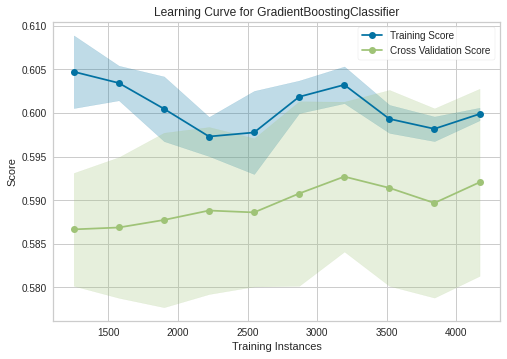

In [39]:
plot_model(estimator = tuned_gbc, plot = 'learning')#Plotting Learning curve 

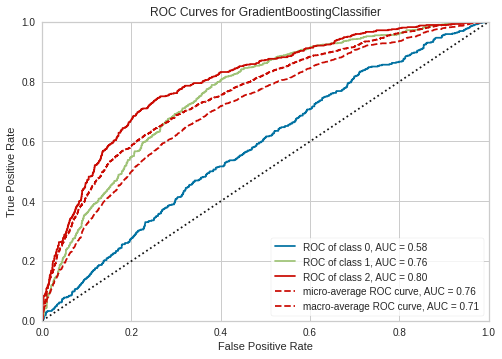

In [40]:
plot_model(estimator = tuned_gbc, plot = 'auc')#Plotting AUC Scores

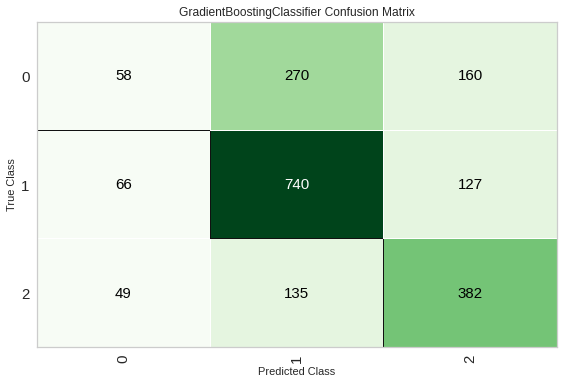

In [41]:
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')#Plotting Confusion Matrix

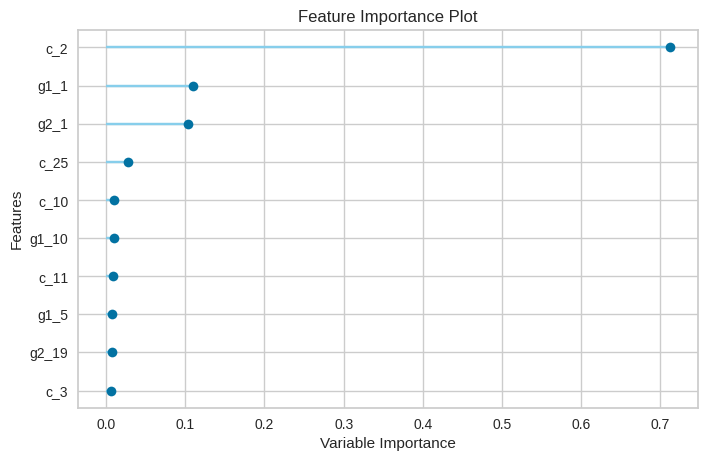

In [42]:
plot_model(estimator = tuned_gbc, plot = 'feature')#Feature Importances Based on GBModel

In [43]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#interpret_model(tuned_gbc)

In [ ]:
#predict_model(tuned_gbc, data=X_test)

<h1 style="background-color:lightgreen;color:white;text-align:center;">ADABoost Model</h1>

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),random_state = 42)
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[5,10,15,20,100],
              "learning_rate":  [0.05, 0.5, 1]}
ada_clf = GridSearchCV(ada_clf, parameters, cv=3, scoring="accuracy")
ada_clf.fit(X_train, y_train)
print(f'Best parameters {ada_clf.best_params_}')
print('-----')
print(f'Mean cross-validated accuracy score of the best_estimator: '+f'{ada_clf.best_score_:.3f}')

Best parameters {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.05, 'n_estimators': 20}
-----
Mean cross-validated accuracy score of the best_estimator: 0.594


In [45]:
print("Test Accuracy:",ada_clf.score(X_test, y_test))

Test Accuracy: 0.5861027190332326


<h1 style="background-color:lightgreen;color:white;text-align:center;">Confusion Matrix</h1>

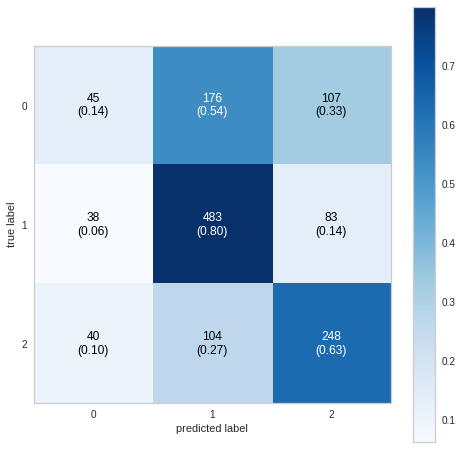

In [46]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

Y_Pred=ada_clf.predict(X_test)
cnf_mat=confusion_matrix(y_test, Y_Pred)
fig, ax = plot_confusion_matrix(conf_mat=cnf_mat,figsize=(8, 8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

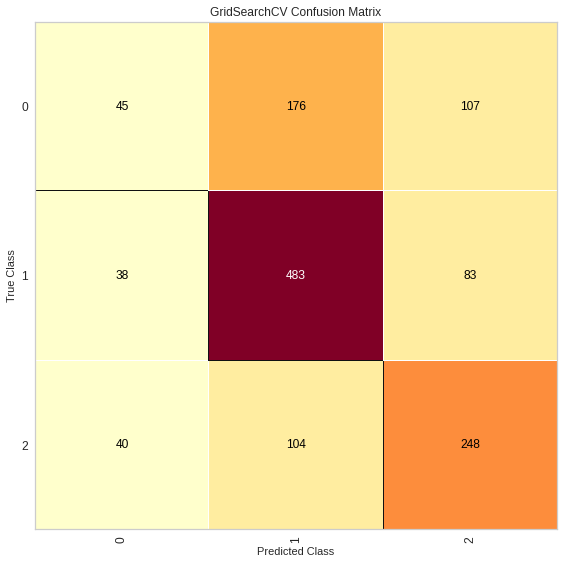

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:
from yellowbrick.classifier import ConfusionMatrix
fig=plt.figure(figsize=(8,8))
classes=["0", "1", "2"]
cnf_mat=ConfusionMatrix(ada_clf, classes=classes,label_encoder={0: 'non_Profitable', 1: 'Group_1', 2: 'Group_2'})
cnf_mat.fit(X_train, y_train)
cnf_mat.score(X_test, y_test)
cnf_mat.show()

<h1 style="background-color:lightgreen;color:white;text-align:center;">Classification Report</h1>

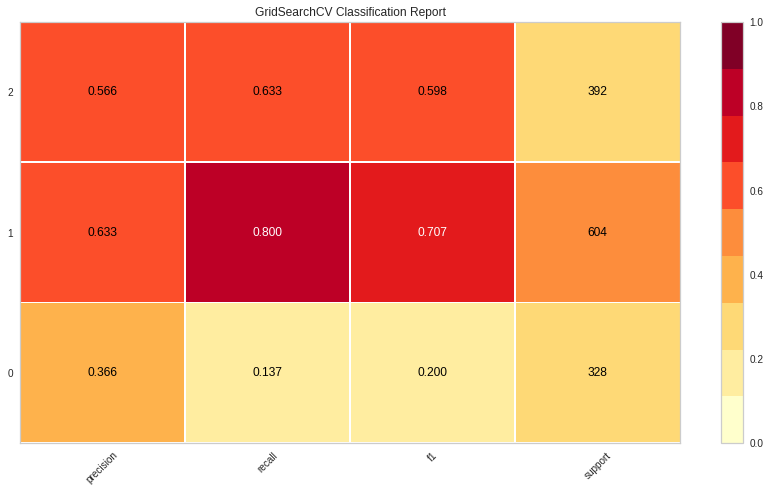

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [48]:
fig=plt.figure(figsize=(12,7))
from yellowbrick.classifier import ClassificationReport
classes=["0", "1", "2"]
visualizer = ClassificationReport(ada_clf, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

<h1 style="background-color:lightgreen;color:white;text-align:center;">Precision-Recall Curve</h1>

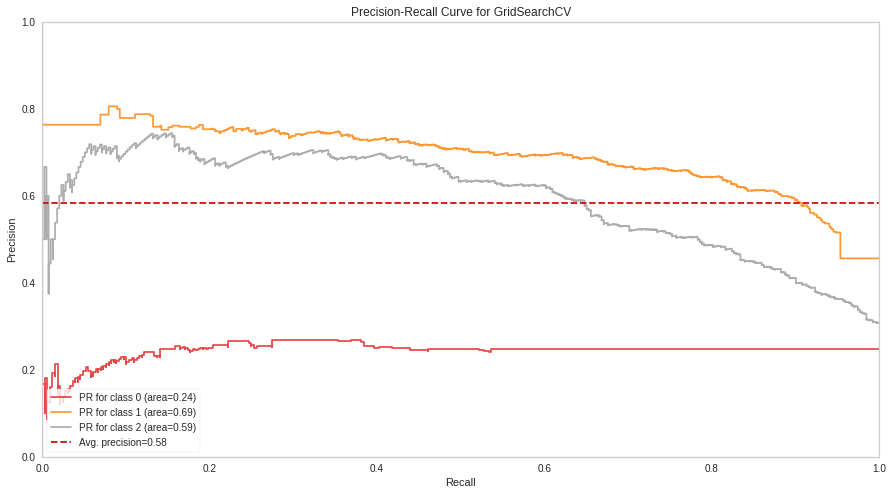

<AxesSubplot:title={'center':'Precision-Recall Curve for GridSearchCV'}, xlabel='Recall', ylabel='Precision'>

In [49]:
fig=plt.figure(figsize=(15,8))
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(ada_clf,per_class=True,
    cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

<h1 style="background-color:lightgreen;color:white;text-align:center;">AUROC</h1>

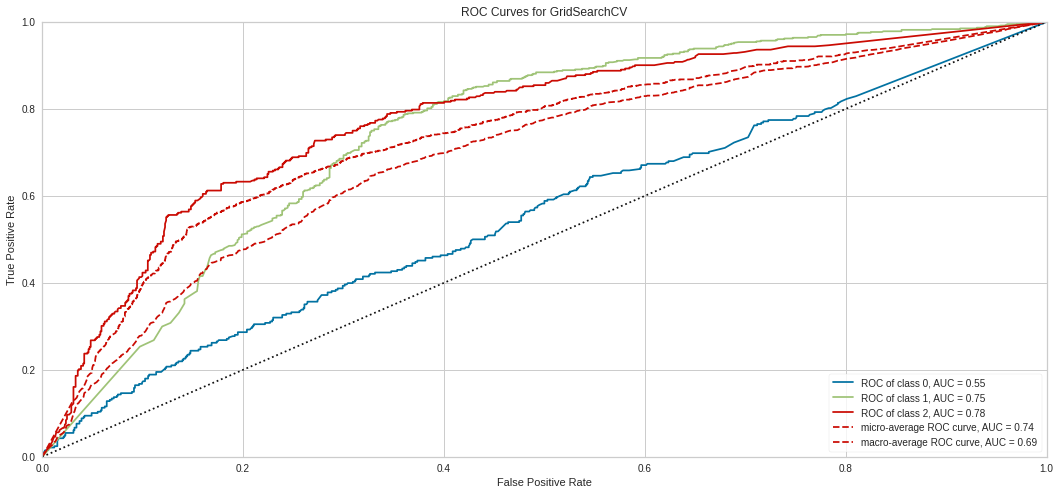

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
fig=plt.figure(figsize=(18,8))
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(ada_clf, classes=["0", "1", "2"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

<h1 style="background-color:lightgreen;color:white;text-align:center;">Class Prediction Error</h1>

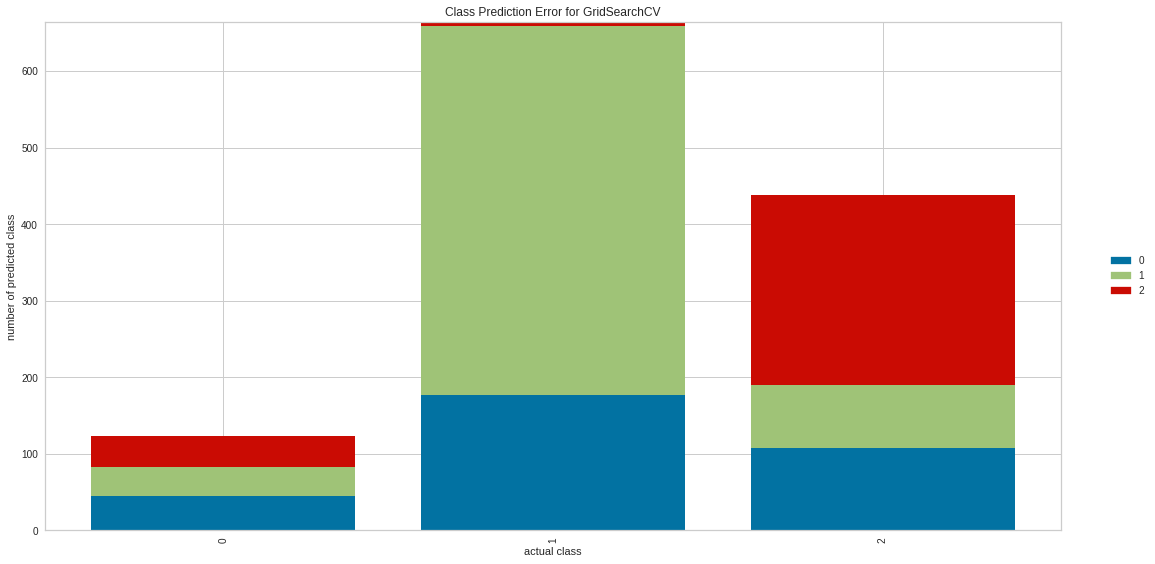

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [51]:
from yellowbrick.classifier import ClassPredictionError
fig=plt.figure(figsize=(18,8))
visualizer = ClassPredictionError(ada_clf,per_class=True,cmap="Set1")
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

<h1 style="background-color:lightgreen;color:white;text-align:center;">Observations</h1>

Based on my Analysis model would suggest to go for Customers in Group 1. Reason being:
1. Our Model Accuracy being 59% says about 59% of time it correctly labelled the customer in respective groups.
2. The precision of Model for Class1(0.63) > Class 0(0.36) & Class 2(0.57) which says among the labelled customers as Class 1. Model correctly predicts them as class 1 with score of 63% i.e 63 out of every 100 class 1 customers are correctly predicted.
3. In this scenario we want our assumptions to be more correct rather than false negatives and true negative( i.e we want to be more confident in our decisions so based on True Positive rates we can see 80% True Positive Scores.). Though it would also depend on customer behaviour and other demographic and social factors.
4. Also the Recall Score of Class 1 Group is better than other two group which says (False Positive better than False Negative). 
<br>

**Suggestion:** Should perform A/B Testing. 

<br>
**Still Room for Improvement**